In [1]:
import pandas as pd
import dill as pickle

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("data/market_value.csv", delimiter=",")
df = data.copy()

In [3]:
df.head(10)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
5,/harry-maguire/profil/spieler/177907,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,...,0.000000,0.000000,4762,148,27,1,25000000,70000000,2,0
6,/victor-lindelof/profil/spieler/184573,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,...,0.000000,0.000000,5471,95,19,10,15000000,35000000,2,0
7,/phil-jones/profil/spieler/117996,Manchester United,Phil Jones,Defender Centre-Back,185.0,31.0,8,0.000000,0.000000,0.216346,...,0.000000,0.000000,416,932,169,7,2000000,20000000,2,0
8,/teden-mengi/profil/spieler/548470,Manchester United,Teden Mengi,Defender Centre-Back,186.0,21.0,34,0.000000,0.000000,0.130529,...,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
9,/luke-shaw/profil/spieler/183288,Manchester United,Luke Shaw,Defender Left-Back,178.0,27.0,74,0.015374,0.169115,0.353604,...,0.000000,0.000000,5854,443,70,4,35000000,42000000,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [5]:
# we will reencode postitions ourselves
df.drop("position_encoded", axis=1, inplace=True)

In [6]:
pd.set_option("float_format", "{:,.2f}".format)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
height,"10,754.00",181.24,6.97,156.00,176.00,181.24,186.00,206.00
age,"10,754.00",26.04,4.78,15.00,22.00,26.00,29.00,43.00
appearance,"10,754.00",36.41,26.53,0.00,12.00,35.00,59.00,107.00
goals,"10,754.00",0.13,0.24,0.00,0.00,0.05,0.17,11.25
assists,"10,754.00",0.09,0.14,0.00,0.00,0.04,0.13,4.00
yellow cards,"10,754.00",0.19,0.43,0.00,0.05,0.15,0.25,30.00
second yellow cards,"10,754.00",0.00,0.03,0.00,0.00,0.00,0.00,1.00
red cards,"10,754.00",0.01,0.08,0.00,0.00,0.00,0.00,6.92
goals conceded,"10,754.00",0.13,0.44,0.00,0.00,0.00,0.00,9.00
clean sheets,"10,754.00",0.04,0.92,0.00,0.00,0.00,0.00,90.00


<Axes: ylabel='position'>

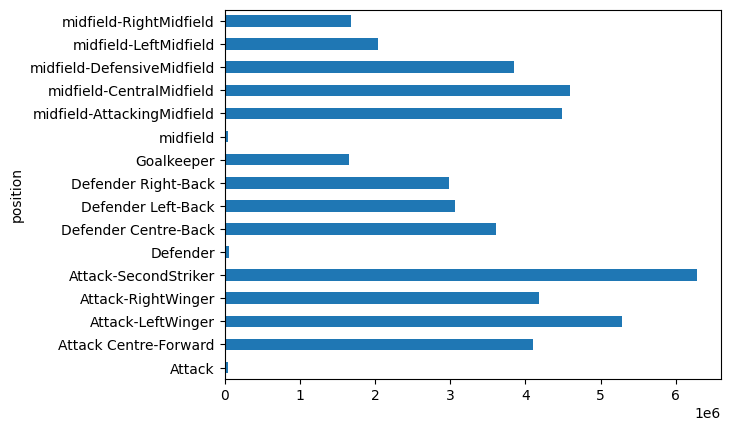

In [7]:
# plot value vs. position
df.groupby("position").current_value.mean().plot.barh()

In [8]:
# remove positions which make no sense
truth = df["position"].isin(["Defender", "midfield", "Attack"])
df.drop(df[truth].index, inplace=True)

In [9]:
df["position"].unique()

array(['Goalkeeper', 'Defender Centre-Back', 'Defender Left-Back',
       'Defender Right-Back', 'midfield-DefensiveMidfield',
       'midfield-CentralMidfield', 'midfield-AttackingMidfield',
       'Attack-LeftWinger', 'Attack-RightWinger', 'Attack Centre-Forward',
       'midfield-RightMidfield', 'midfield-LeftMidfield',
       'Attack-SecondStriker'], dtype=object)

In [10]:
# aggregate positions
simplified_pos = {
    "Goalkeeper": "GK",
    "Defender Centre-Back": "DF",
    "Defender Left-Back": "DF",
    "Defender Right-Back": "DF",
    "midfield-DefensiveMidfield": "MF",
    "midfield-CentralMidfield": "MF",
    "midfield-AttackingMidfield": "MF",
    "midfield-RightMidfield": "MF",
    "midfield-LeftMidfield": "MF",
    "Attack-LeftWinger": "FW",
    "Attack-RightWinger": "FW",
    "Attack Centre-Forward": "FW",
    "Attack-SecondStriker": "FW",
}
df["position"] = df["position"].apply(lambda x: simplified_pos[x])

In [11]:
# make categorical variables & remove those which we won't use for the prediction
df = pd.concat([df, pd.get_dummies(df["position"], dtype=float)], axis=1)
to_drop = [
    "player",
    "team",
    "name",
    "position",
    "height",
    "award",
    "highest_value",
    "goals conceded",
    "clean sheets",
    "days_injured",
    "games_injured",
]
df.drop(columns=to_drop, inplace=True)

In [12]:
# remove variables uncorrelated to "current_value"
threshold = .005
corr = df.corr()["current_value"]
features_less_than_threshold = corr[abs(corr) < threshold].index
print(f"Features to be removed : {features_less_than_threshold}")
df.drop(columns=["winger"], inplace=True)

Features to be removed : Index(['winger'], dtype='object')


In [18]:
df = df.astype("float64")

In [19]:
X = df.drop('current_value', axis=1)
y = df['current_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [27]:
# look at the exact data to be used for training
X_train.head()

,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,DF,FW,GK,MF
4401,23.00,43.00,0.12,0.12,0.41,0.00,0.00,"2,195.00",0.00,0.00,0.00,1.00
1929,30.00,56.00,0.02,0.02,0.21,0.00,0.00,"4,794.00",1.00,0.00,0.00,0.00
5094,22.00,41.00,0.03,0.00,0.31,0.00,0.00,"2,901.00",0.00,0.00,0.00,1.00
2867,22.00,25.00,0.09,0.05,0.19,0.00,0.00,"1,945.00",1.00,0.00,0.00,0.00
6607,23.00,46.00,0.00,0.07,0.28,0.04,0.00,"2,569.00",0.00,0.00,0.00,1.00


In [21]:
# set up the pipeline (we don't need to normalize when using RF)
steps = [("scaler", StandardScaler()),
         ("regressor", RandomForestRegressor(n_estimators=150))]
pipe = Pipeline(steps)

In [22]:
%%capture
# train the model
pipe.fit(X_train, y_train)

In [23]:
# make predictions
y_pred = pipe.predict(X_test)
r2_squared_score = r2_score(y_test, y_pred)
print(f"Root squared score obtained : {r2_squared_score}")

Root squared score obtained : 0.17109104371453132


In [24]:
# recover the players info
X_test["y_test"] = y_test
X_test["y_pred"] = y_pred
to_look_at = X_test.join(data[["team", "name", "position"]])

In [25]:
# compare the the current value & predicted value
to_look_at[[
    "name",
    "team",
    "position",
    "goals",
    "assists",
    "y_test",
    "y_pred",
]]

,name,team,position,goals,assists,y_test,y_pred
3721,Gabriel Menino,Sociedade Esportiva Palmeiras,midfield-CentralMidfield,0.12,0.12,"8,000,000.00","1,173,000.00"
1981,José Luis Palomino,Atalanta BC,Defender Centre-Back,0.06,0.02,"3,500,000.00","825,500.00"
9850,Young-suk Kang,Jeonbuk Hyundai Motors,midfield-DefensiveMidfield,0.08,0.08,"50,000.00","1,462,000.00"
7997,Carlos Arce,CA Barracas Central,midfield-DefensiveMidfield,0.07,0.00,"50,000.00","821,000.00"
8990,Mailson,Al-Taawoun FC,Goalkeeper,0.00,0.00,"3,000,000.00","1,602,333.33"
...,...,...,...,...,...,...,...
6562,Bernhard Zimmermann,Rapid Vienna,Attack Centre-Forward,0.50,0.15,"1,000,000.00","7,333,000.00"
8112,Alan Rodríguez,AA Argentinos Juniors,midfield-CentralMidfield,0.00,0.00,"1,300,000.00","577,666.67"
3283,Nino,Fluminense Football Club,Defender Centre-Back,0.21,0.00,"7,000,000.00","2,575,666.67"
6168,David Jensen,Istanbulspor,Goalkeeper,0.00,0.00,"400,000.00","2,484,833.33"


In [26]:
# save model for latter use
filename = "player_value_predictor.pk"
with open(filename, "wb") as file:
    pickle.dump(pipe, file)